In [2]:
using Distributions
using Optim
using PyPlot

### Example 1.6.5: Tropical cyclones (p. 15)

Let $Y_i$ denote the number of tropical cyclones in each of thirteen successive seasons.

In [3]:
Y = [6; 5; 4; 6; 6; 3; 12; 7; 4; 2; 6; 7; 4];

Suppose the $Y_i$'s are independent random variables with the Poisson distribution with parameter $\theta$.

In [4]:
θ̂ = y̅ = mean(Y)

5.538461538461538

Alternatively solve numerically. The log-likelihood function is

In [5]:
function l(θ)
    sum(Y) * log(θ) - length(Y) * θ - mapreduce((y) -> log(factorial(y)), +, 0, Y)
end;

We can plot the log likelihood function for a range of values of $\theta$. This shows a maximum somewhere midway between 5 and 6.

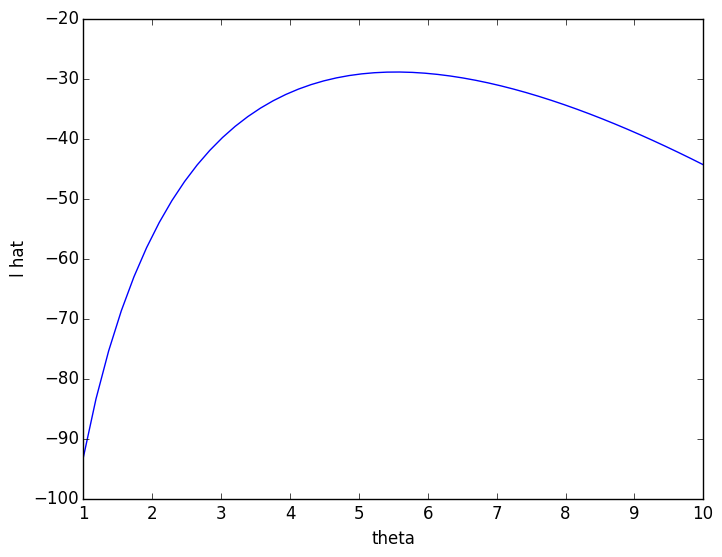

In [6]:
θ = linspace(1, 10)

l̂ = Array{Float64}(size(θ))

for i in eachindex(θ)
    l̂[i] = l(θ[i])
end

p = plot(θ, l̂)
xlabel("theta")
ylabel("l hat");

In [7]:
θ̃ = optimize((θ) -> -l(θ), 0, 10).minimum

5.538461459508111

In [8]:
θ̂ - θ̃

7.895342690744656e-8